In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

from PIL import Image
import cv2

from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [68]:
DATA_DIR="E:/malaria data set/cell_images/cell_images/"
SIZE=64
dataset=[]
label=[]


In [69]:
#parasitized images
parasitized_images=os.listdir(DATA_DIR + 'Parasitized/')
for i,image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1]=="png"):
            image=cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image=Image.fromarray(image,"RGB")
            image=image.resize((64,64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("could not read image {} with name {}".format(i,image_name))
        

In [70]:
#uninfected images
uninfected_images=os.listdir(DATA_DIR + 'Uninfected/')
for i,image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1]=="png"):
            image=cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image=Image.fromarray(image,"RGB")
            image=image.resize((64,64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("could not read image {} with name {}".format(i,image_name))
        

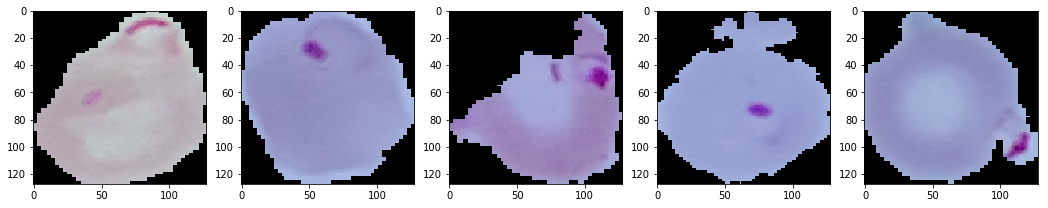

In [56]:
#visualizing the Parasitized images 
plt.figure(figsize=(18,12))
for index,image_index in enumerate(np.random.randint(len(parasitized_images),size=5)):
    plt.subplot(1,5,index+1)
    plt.imshow(dataset[image_index])

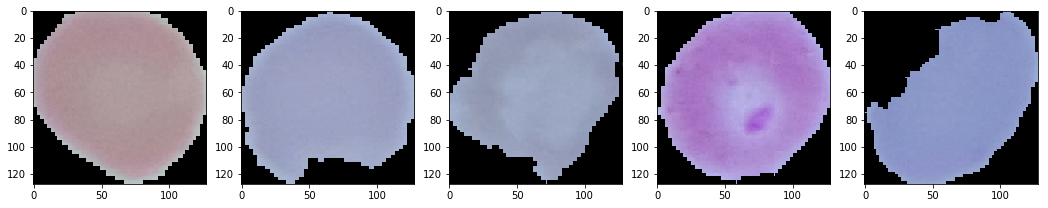

In [57]:
#visualizing the uninfectde images
plt.figure(figsize=(18,12))
for index,image_index in enumerate(np.random.randint(len(uninfected_images),size=5)):
    plt.subplot(1,5,index+1)
    plt.imshow(dataset[len(parasitized_images)+image_index])

In [71]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.30,random_state=123)

In [72]:
#AUG
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(train_X),
                                       train_y,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(test_X),
                                     test_y,
                                     batch_size = 64,
                                     shuffle = False)

In [83]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [84]:
model.fit(train_generator,validation_data=test_generator,epochs=10,verbose=1,shuffle=False)

Epoch 1/10
302/302 [==============================] - 128s 425ms/step - loss: 0.5535 - accuracy: 0.7203 - val_loss: 4.0168 - val_accuracy: 0.4992
Epoch 2/10
302/302 [==============================] - 118s 392ms/step - loss: 0.3119 - accuracy: 0.8764 - val_loss: 0.4335 - val_accuracy: 0.7366
Epoch 3/10
302/302 [==============================] - 129s 429ms/step - loss: 0.2630 - accuracy: 0.9023 - val_loss: 0.0213 - val_accuracy: 0.9376
Epoch 4/10
302/302 [==============================] - 119s 395ms/step - loss: 0.2407 - accuracy: 0.9100 - val_loss: 0.3229 - val_accuracy: 0.8359
Epoch 5/10
302/302 [==============================] - 115s 380ms/step - loss: 0.2208 - accuracy: 0.9184 - val_loss: 0.0167 - val_accuracy: 0.9479
Epoch 6/10
302/302 [==============================] - 114s 378ms/step - loss: 0.2096 - accuracy: 0.9239 - val_loss: 0.0269 - val_accuracy: 0.9334
Epoch 7/10
302/302 [==============================] - 114s 377ms/step - loss: 0.1995 - accuracy: 0.9315 - val_loss: 0.0064 -

In [85]:
model2 = Sequential()
model2.add(Convolution2D(64, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model2.add(BatchNormalization(axis = -1))
model2.add(Dropout(0.2))

model2.add(Convolution2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model2.add(BatchNormalization(axis = -1))
model2.add(Dropout(0.2))
model2.add(Flatten())

model2.add(Dense(activation = 'relu', units=512))
model2.add(BatchNormalization(axis = -1))
model2.add(Dropout(0.2))

model2.add(Dense(activation = 'relu', units=256))
model2.add(BatchNormalization(axis = -1))
model2.add(Dropout(0.2))

model2.add(Dense(activation = 'sigmoid', units=2))
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [86]:
#building model on augumented data to improve the Accuracy
history2=model2.fit_generator(train_generator,validation_data=test_generator,epochs=5,verbose=1,
                            shuffle=False)

Epoch 1/5
302/302 [==============================] - 458s 2s/step - loss: 0.5186 - accuracy: 0.7497 - val_loss: 3.4395 - val_accuracy: 0.4990
Epoch 2/5
302/302 [==============================] - 460s 2s/step - loss: 0.2877 - accuracy: 0.8936 - val_loss: 0.3733 - val_accuracy: 0.7358
Epoch 3/5
302/302 [==============================] - 450s 1s/step - loss: 0.2481 - accuracy: 0.9072 - val_loss: 0.0223 - val_accuracy: 0.9280
Epoch 4/5
302/302 [==============================] - 448s 1s/step - loss: 0.2207 - accuracy: 0.9218 - val_loss: 0.0172 - val_accuracy: 0.9450
Epoch 5/5
302/302 [==============================] - 458s 2s/step - loss: 0.2058 - accuracy: 0.9261 - val_loss: 0.0081 - val_accuracy: 0.9422


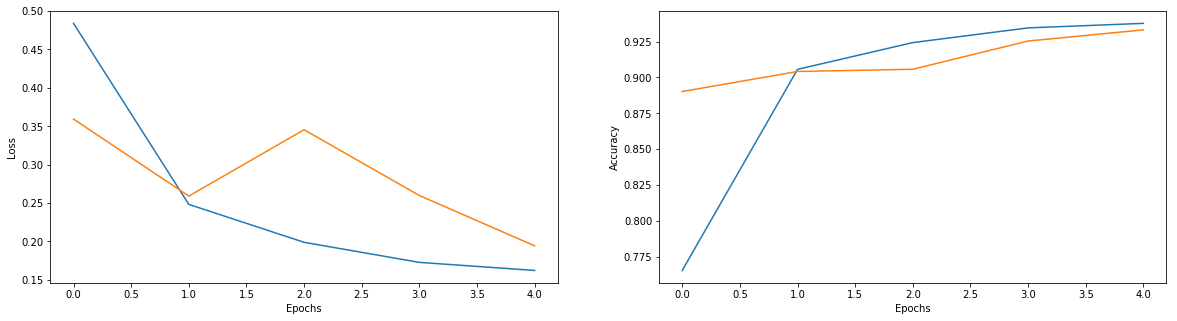

In [87]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)